In [1]:
!pip install tensorflow==2.17.1
!pip install matplotlib==3.9.2

print("==== All required libraries are installed =====")

==== All required libraries are installed =====


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [3]:

from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)


In [4]:
import numpy as np
lengths = [len(x) for x in x_train]
np.percentile(lengths, 90)


467.0

In [5]:
from keras.preprocessing.sequence import pad_sequences

max_len = 467
x_train = pad_sequences(x_train, maxlen=max_len)
x_test  = pad_sequences(x_test, maxlen=max_len)


In [6]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM


In [7]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

history = model.fit(
    x_train, y_train,
    epochs=4,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks

)

Epoch 1/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 183s 578ms/step - accuracy: 0.6607 - loss: 0.5977 - val_accuracy: 0.8500 - val_loss: 0.3585 - learning_rate: 0.0010
Epoch 2/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 181s 580ms/step - accuracy: 0.8402 - loss: 0.3771 - val_accuracy: 0.7978 - val_loss: 0.4361 - learning_rate: 0.0010
Epoch 3/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 185s 591ms/step - accuracy: 0.8742 - loss: 0.3165 - val_accuracy: 0.8496 - val_loss: 0.3608 - learning_rate: 0.0010
Epoch 4/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 186s 594ms/step - accuracy: 0.8978 - loss: 0.2659 - val_accuracy: 0.8574 - val_loss: 0.3750 - learning_rate: 5.0000e-04


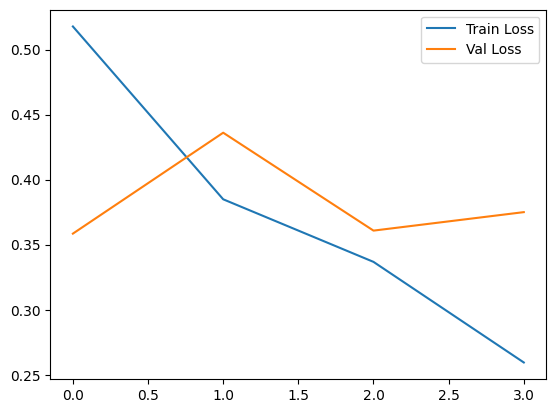

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


In [15]:
# أضف هذا في نهاية كود التدريب:
model.save('imdb_sentiment_model.keras')

In [17]:
import tensorflow as tf
model = tf.keras.models.load_model('imdb_sentiment_model.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
